# WrongSecrets Git Notes Research

The purpose of this research is to evaluate usage of git notes in prominent GitHub repositories. We want to test whether git notes are still used. We expect they aren't, so in research fashion, in this notebook we'll see if the null hypothesis (git notes are used) can be rejected. 

For those repositories that use git notes, we'll evaluate to what extent, and how.

## Prerequisites

First, we need to install and load some libraries, and load the dataset that we collected earlier (collected using the code posted in https://github.com/RemakingEden/git-notes-research)

In [16]:
import duckdb
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
# create a connection to a file called 'file.db'
con = duckdb.connect('databases/1000-repos.db')

## Exploratory data analysis
Let's get the tables and print some example entries along with their schema.

In [18]:
# Get the available tables
con.execute("SELECT * FROM sqlite_master WHERE type='table';").fetchdf()

,type,name,tbl_name,rootpage,sql
0,table,repos,repos,0,"CREATE TABLE repos(id VARCHAR, ""name"" VARCHAR ..."
1,table,notes,notes,0,"CREATE TABLE notes(id VARCHAR, repo_id VARCHAR..."


In [19]:
# Get the available columns from the repos table
con.execute("SELECT * FROM repos LIMIT 1;").fetchdf()

,id,name,license,stars,has_notes,notes_count,total_contributors,repo_created_at,repo_updated_at,created_at,updated_at
0,01HDSEZ50PZNBDQAHHCTW0N423,freeCodeCamp,bsd-3-clause,376458,False,0,395,2014-12-24 17:49:19,2023-10-27 20:09:41,2023-10-27 20:59:45.860,2023-10-27 20:59:45.860


In [20]:
con.execute("SELECT * FROM notes LIMIT 1;").fetchdf()

,id,repo_id,content,note_created_at,note_ref,author,created_at,updated_at
0,01HDSGGWKD74K4KZ7VSGHA138B,01HDSGERYG0ABHDA7TMMAFGJ7Y,PR-URL: #11006\nReviewed-By: Michael Dawson <m...,2017-02-09 20:19:14.123,901e926d43a875af0bf2164c62770f7a835edf19,Sam Roberts <vieuxtech@gmail.com>,2023-10-27 21:26:55.341,2023-10-27 21:26:55.341


Let's visualize the number of repositores with notes vs without notes.

In [21]:
df = con.execute("SELECT * FROM repos;").fetchdf()
df.head()


,id,name,license,stars,has_notes,notes_count,total_contributors,repo_created_at,repo_updated_at,created_at,updated_at
0,01HDSEZ50PZNBDQAHHCTW0N423,freeCodeCamp,bsd-3-clause,376458,False,0.0,395.0,2014-12-24 17:49:19,2023-10-27 20:09:41,2023-10-27 20:59:45.860,2023-10-27 20:59:45.860
1,01HDSF090VSM9Y19N5753STDGG,free-programming-books,cc-by-4.0,301963,False,0.0,430.0,2013-10-11 06:50:37,2023-10-27 20:55:34,2023-10-27 21:00:22.428,2023-10-27 21:00:22.428
2,01HDSF0G2G1DD9030TQF9FXVZN,awesome,cc0-1.0,274997,False,0.0,435.0,2014-07-11 13:42:37,2023-10-27 20:39:52,2023-10-27 21:00:29.648,2023-10-27 21:00:29.648
3,01HDSF0KX5733J6DH0Y7FVCNR1,coding-interview-university,cc-by-sa-4.0,270143,False,0.0,289.0,2016-06-06 02:34:12,2023-10-27 20:07:07,2023-10-27 21:00:33.573,2023-10-27 21:00:33.573
4,01HDSF0V8Q6EBAKY5B0YEHNEG3,996.ICU,other,268074,False,0.0,402.0,2019-03-26 07:31:14,2023-10-27 19:25:15,2023-10-27 21:00:41.111,2023-10-27 21:00:41.111


<Axes: title={'center': 'Number of Repos with Notes'}, xlabel='Has Notes', ylabel='Number of Repos'>

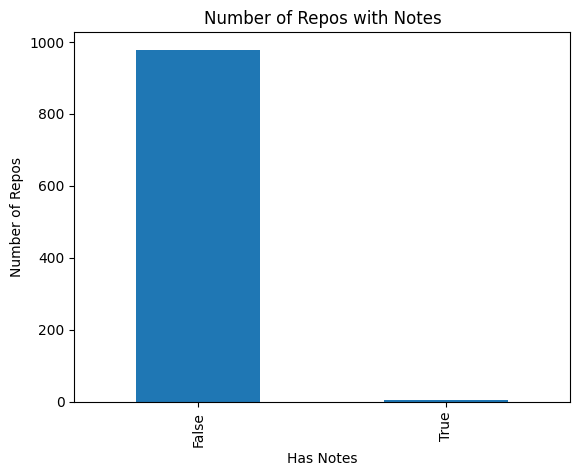

In [22]:
df['has_notes'].value_counts().plot(kind='bar', title='Number of Repos with Notes', xlabel='Has Notes', ylabel='Number of Repos')

When were those notes added, and how many authors did this? Let's plot a timeline.

In [23]:
df_notes = con.execute("SELECT notes.*, repos.name FROM notes LEFT JOIN repos ON notes.repo_id = repos.id;").fetchdf()
df_notes.head()

,id,repo_id,content,note_created_at,note_ref,author,created_at,updated_at,name
0,01HDSGGWKD74K4KZ7VSGHA138B,01HDSGERYG0ABHDA7TMMAFGJ7Y,PR-URL: #11006\nReviewed-By: Michael Dawson <m...,2017-02-09 20:19:14.123,901e926d43a875af0bf2164c62770f7a835edf19,Sam Roberts <vieuxtech@gmail.com>,2023-10-27 21:26:55.341,2023-10-27 21:26:55.341,node
1,01HDSHHYBP3WGR3PWRTPV4QMDM,01HDSHHCRZBMNRSZ7ASE5CSY48,Fixes gh-563\n,2014-03-24 18:44:52.123,d42bedf295cfad3a9edbb3e0a032c14629737460,Phillip Webb <pwebb@gopivotal.com>,2023-10-27 21:44:58.487,2023-10-27 21:44:58.487,spring-boot
2,01HDSJ59C38V895064YHZXC888,01HDSJ53052D3S6XWTRK33KVB9,This also adds extracting storyboards from DAS...,2021-06-13 15:06:40.123,cdb19aa4c254a1e4dea942f51d22790b7c99021c,felix <felix.von.s@posteo.de>,2023-10-27 21:55:32.356,2023-10-27 21:55:32.356,yt-dlp
3,01HDSJPD9J4GJ653ZJ8WWNS75P,01HDSJPCRDF9VRPF99VVQ31S5S,Issue: SPR-9007 (not SPR-9014)\n,2012-02-13 14:01:06.123,0a5392e37d268d4df9526216531a6655e52b9f38,Chris Beams <cbeams@vmware.com>,2023-10-27 22:04:53.427,2023-10-27 22:04:53.427,spring-framework
4,01HDSMVJSZ8CBXXTT2GND4CT91,01HDSMTB8MG5JPAN1K5VHGGRPH,another note\n,2019-07-16 18:23:13.123,e46ff190351a96adaf3a8477b9ee59aefa640495,Ben Kucera <14625260+Bkucera@users.noreply.git...,2023-10-27 22:42:40.064,2023-10-27 22:42:40.064,cypress


<Axes: title={'center': 'Amount of notes per repo'}, xlabel='name'>

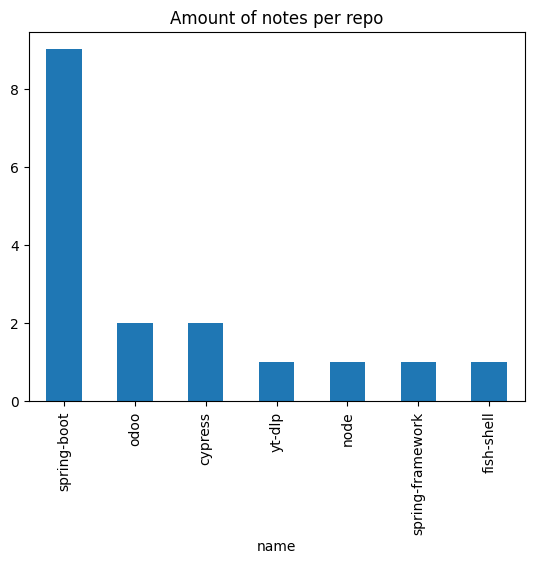

In [24]:
# Plot the amount of notes per repo
df_notes['name'].value_counts().plot(kind='bar', title='Amount of notes per repo')

<Axes: title={'center': 'Amount of notes per author'}, xlabel='author'>

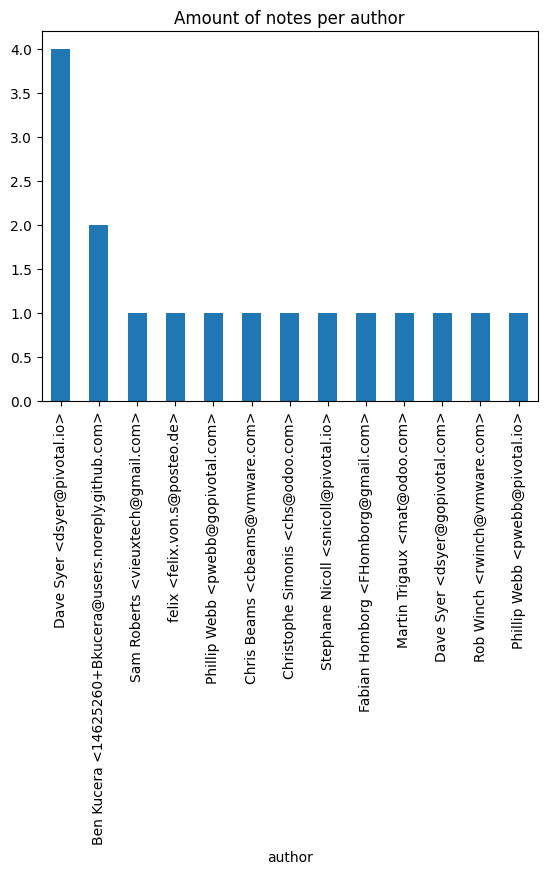

In [25]:
# Plot the amount of notes per author
df_notes['author'].value_counts().plot(kind='bar', title='Amount of notes per author')

What kind of licenses do repos with notes have?

<Axes: title={'center': 'License types of repos with notes'}, xlabel='license'>

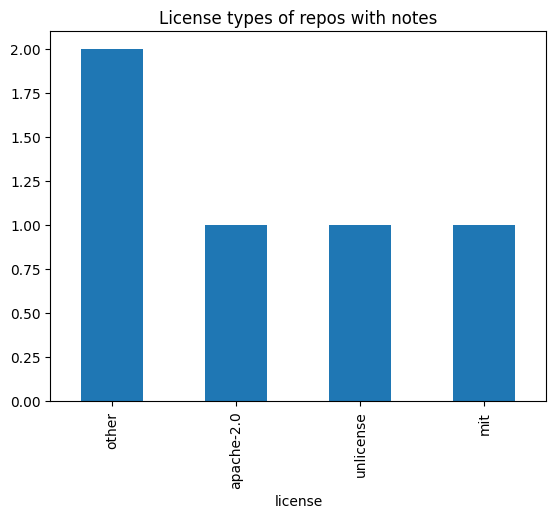

In [26]:
df[df['has_notes'].fillna(False)]['license'].value_counts().plot(kind='bar', title='License types of repos with notes')

<Axes: title={'center': 'Amount of stars for repos with notes'}>

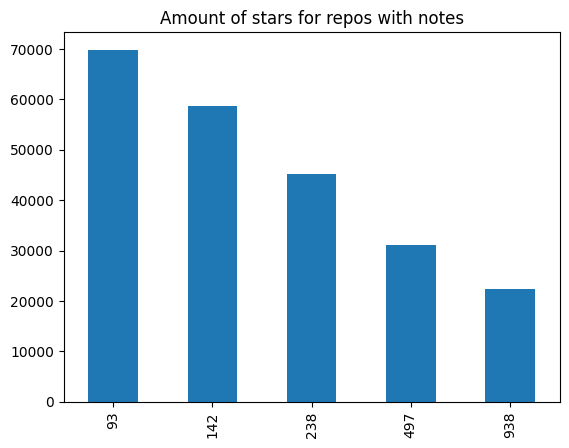

In [27]:
# amount of stars for repos with notes
df[df['has_notes'].fillna(False)]['stars'].plot(kind='bar', title='Amount of stars for repos with notes')

<Axes: title={'center': 'Amount of contributors per repo with notes'}, xlabel='total_contributors'>

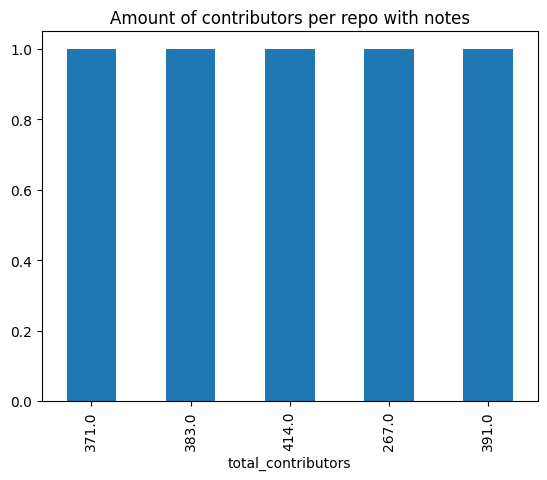

In [28]:
# amount of contributors per repo with notes
df[df['has_notes'].fillna(False)]['total_contributors'].value_counts().plot(kind='bar', title='Amount of contributors per repo with notes')